<a href="https://colab.research.google.com/github/Malika44/CodeAcademy/blob/main/Fruad_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/Synthetic_Financial_datasets_log.csv")

In [ ]:
print("five first row of the data:\n",df.head())

five first row of the data:
    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [ ]:
print("check information of data:\n",df.info())
print("null values are:\n",df.isnull().sum())
# Optional: nameOrig and nameDest can be dropped unless needed for specific analysis
# They are commented out because they're needed in Group Analysis (Phase 3.2)
# df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818487 entries, 0 to 818486
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            818487 non-null  int64  
 1   type            818486 non-null  object 
 2   amount          818486 non-null  float64
 3   nameOrig        818486 non-null  object 
 4   oldbalanceOrg   818486 non-null  float64
 5   newbalanceOrig  818486 non-null  float64
 6   nameDest        818486 non-null  object 
 7   oldbalanceDest  818486 non-null  float64
 8   newbalanceDest  818486 non-null  float64
 9   isFraud         818486 non-null  float64
 10  isFlaggedFraud  818486 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 68.7+ MB
check information of data:
 None
null values are:
 step              0
type              1
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest   

In [ ]:
total = len(df) #calculate total number of transaction
totalByType = df['type'].value_counts()#count trancaction by type
print("Total transactions:", total)
print("By type:\n", totalByType)

Total transactions: 818487
By type:
 type
CASH_OUT    294927
PAYMENT     271623
CASH_IN     178702
TRANSFER     67722
DEBIT         5512
Name: count, dtype: int64


In [ ]:
fraudRate = df['isFraud'].mean() * 100 #calculate overall % of fradulant transaction
fraudType = df.groupby('type')['isFraud'].mean() * 100 #fraud rate by each transaction type
print(f"Overall fraud rate: {fraudRate}%")
print("Fraud rate by type:\n", fraudType)

Overall fraud rate: 0.05717874221428345%
Fraud rate by type:
 type
CASH_IN     0.000000
CASH_OUT    0.082054
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.333717
Name: isFraud, dtype: float64


In [ ]:
fraud = df[df['isFraud'] == 1]['amount'].describe() #distrubtion of amount in fradulent transaction

# Non-fraudulent (#distrubtion of amount in non-fradulent transaction )
nonFraud = df[df['isFraud'] == 0]['amount'].describe()

print("Fraudulent transactions:\n", fraud)
print("\nNon-fraudulent transactions:\n", nonFraud)

Fraudulent transactions:
 count    4.680000e+02
mean     9.621162e+05
std      1.889769e+06
min      1.190000e+02
25%      3.463094e+04
50%      2.353754e+05
75%      9.693682e+05
max      1.000000e+07
Name: amount, dtype: float64

Non-fraudulent transactions:
 count    8.180180e+05
mean     1.634139e+05
std      2.623351e+05
min      1.000000e-01
25%      1.300347e+04
50%      7.999394e+04
75%      2.205508e+05
max      6.419835e+06
Name: amount, dtype: float64


In [ ]:
#Flag transactions over the legal threshold of 200,000
df['FlaggedLargeAmount'] = df['amount'] > 200000
flaggedRate = df['FlaggedLargeAmount'].mean() * 100
print("Transactions >200k:", flaggedRate)

Transactions >200k: 28.001299959559528


In [ ]:
#Steps (time) when fraud is most common
fraudDf = df[df['isFraud'] == 1]
patternStep = fraudDf['step'].value_counts().sort_index()
#Fraud distribution by transaction type
patternType = fraudDf['type'].value_counts()
#Distribution of fraudulent amounts
patternAmount = fraudDf['amount'].describe()
print("Fraud pattern by step:\n", patternStep)
print("Fraud pattern by type:\n", patternType)
print("Fraud pattern by amount:\n", patternAmount)

Fraud pattern by step:
 step
1     16
2      8
3      4
4     10
5      6
6     22
7     12
8     12
9     19
10    11
11     7
12    14
13    14
14    12
15    20
16    10
17     7
18    16
19    11
20     4
21     5
22    23
23     2
24     6
25    18
26    12
27     8
28     4
29     4
30     8
31    12
32    12
33    12
34    22
35    15
36    19
37    13
38    16
39    12
40    10
Name: count, dtype: int64
Fraud pattern by type:
 type
CASH_OUT    242
TRANSFER    226
Name: count, dtype: int64
Fraud pattern by amount:
 count    4.680000e+02
mean     9.621162e+05
std      1.889769e+06
min      1.190000e+02
25%      3.463094e+04
50%      2.353754e+05
75%      9.693682e+05
max      1.000000e+07
Name: amount, dtype: float64


In [ ]:
#Transaction volume by type
volumeType = df.groupby('type')['amount'].count()
# Transaction total value by type
valueType = df.groupby('type')['amount'].sum()
print("Volume by type:\n", volumeType)
print("Value by type:\n", valueType)

# Frequent suspects
repeatOrig = df[df['isFraud'] == 1]['nameOrig'].value_counts()#Repeated fraudulent sender accounts (nameOrig)
repeatDest = df[df['isFraud'] == 1]['nameDest'].value_counts()#(Repeated fraudulent recipient accounts (nameDest))
print("sender suspects:\n", repeatOrig)
print("receiver suspects:\n", repeatDest)


Volume by type:
 type
CASH_IN     178702
CASH_OUT    294927
DEBIT         5512
PAYMENT     271623
TRANSFER     67722
Name: amount, dtype: int64
Value by type:
 type
CASH_IN     3.082967e+10
CASH_OUT    5.531576e+10
DEBIT       3.178448e+07
PAYMENT     3.154293e+09
TRANSFER    4.479426e+10
Name: amount, dtype: float64
sender suspects:
 nameOrig
C418271713     1
C1305486145    1
C840083671     1
C1420196421    1
C1507825825    1
              ..
C467632528     1
C1334405552    1
C749981943     1
C1118430673    1
C137533655     1
Name: count, Length: 468, dtype: int64
receiver suspects:
 nameDest
C410033330     2
C200064275     2
C803116137     2
C185805228     2
C1636242484    1
              ..
C1662761228    1
C2041291172    1
C1966002811    1
C537531657     1
C858007309     1
Name: count, Length: 464, dtype: int64


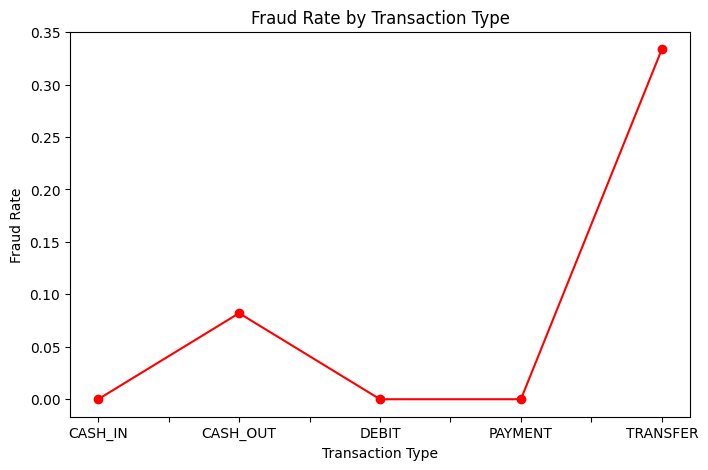

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Line Graph (Fraud rate by transaction type)
fraudType = df.groupby('type')['isFraud'].mean() * 100
plt.figure(figsize=(8,5))
fraudType.plot(marker='o', color='red')
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate')
plt.xlabel('Transaction Type')
plt.show()

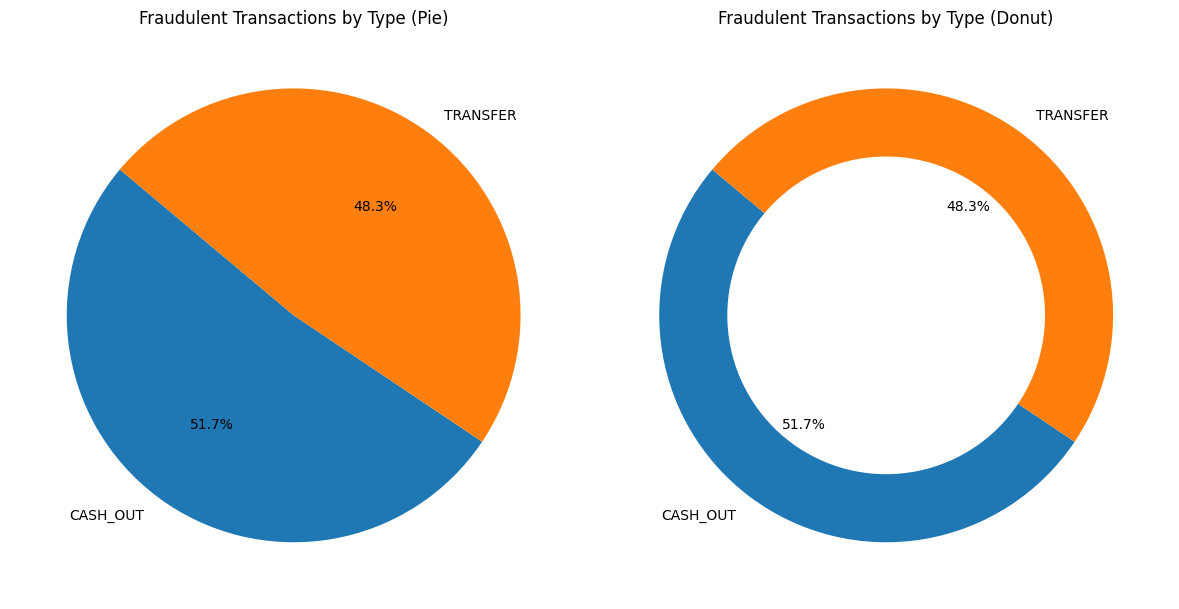

In [ ]:
#Pie Chart, Donut Chart (Fraud distribution by type)
fraudCounts = fraudDf['type'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(fraudCounts, labels=fraudCounts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Fraudulent Transactions by Type (Pie)')
wedges, texts, autotexts = axs[1].pie(fraudCounts, labels=fraudCounts.index,
                                      autopct='%1.1f%%', startangle=140)
# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
axs[1].add_artist(centre_circle)
axs[1].set_title('Fraudulent Transactions by Type (Donut)')
plt.tight_layout()
plt.show()


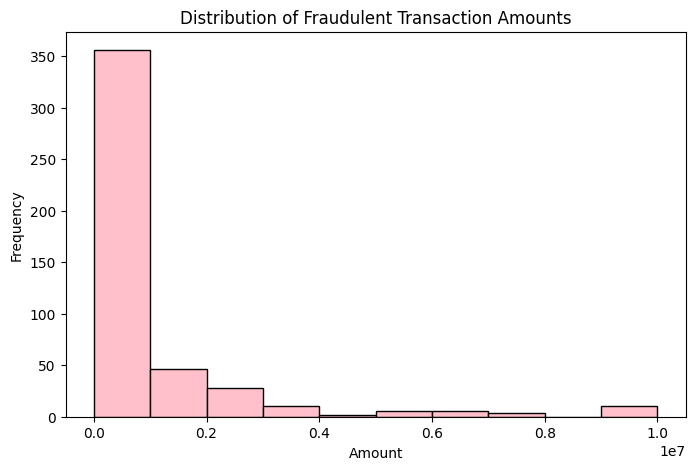

In [ ]:
#Histogram (Distribution of fraudulent transaction amounts)
plt.figure(figsize=(8,5))
plt.hist(fraudDf['amount'], bins=10, color='pink', edgecolor = 'black')
plt.title('Distribution of Fraudulent Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

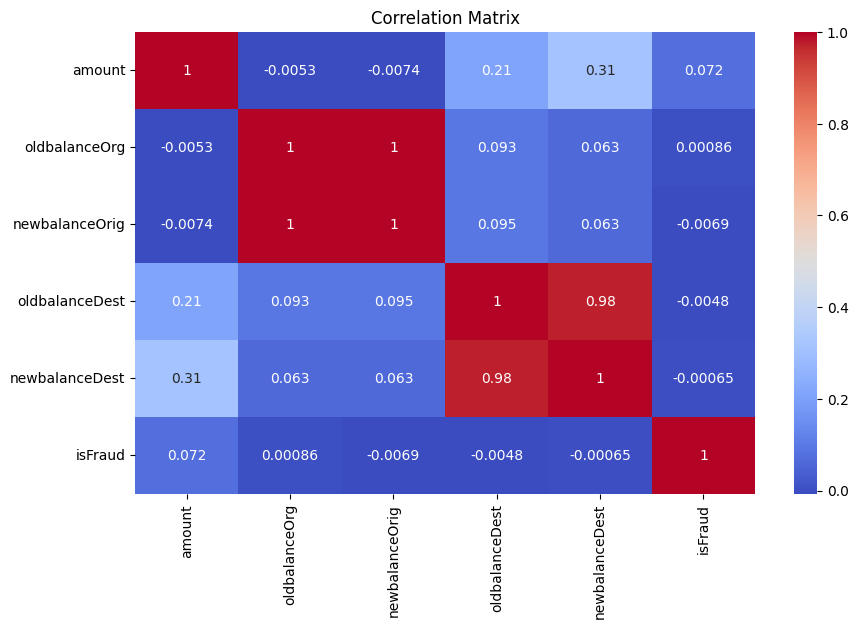

In [ ]:
# Heatmap (Correlation matrix)
plt.figure(figsize=(10, 6))
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()